# Modelo de Regressão Linear Múltipla (MRLM)

## Importações

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Dados de entrada

In [68]:
x0 = [1, 1, 1, 1]
x1 = np.array([3, 1, 2, 5])
x2 = np.array([2, 0, 7, 4])
y = np.array([10, 8, 5, 9])

X = np.column_stack((x0, x1, x2))

## Calculando β

β = (X_T . X)⁻1 . X_T . y

In [69]:
print(f'x = {X}\n\n')
print(f'x_t = {X.T}\n\n')
print(f'(x_t . x) = {X.T @ X}\n\n')
print(f'(x_t . x)⁻1 = {np.linalg.inv(X.T @ X)}\n\n')
print(f'(x_t . x)-1 . x_t = {np.linalg.inv(X.T @ X) @ X.T}\n\n')
print(f'beta = (x_t . x)-1 . x_t . y = {np.linalg.inv(X.T @ X) @ X.T @ y}\n\n')

beta = np.linalg.inv(X.T @ X) @ X.T @ y

x = [[1 3 2]
 [1 1 0]
 [1 2 7]
 [1 5 4]]


x_t = [[1 1 1 1]
 [3 1 2 5]
 [2 0 7 4]]


(x_t . x) = [[ 4 11 13]
 [11 39 40]
 [13 40 69]]


(x_t . x)⁻1 = [[ 1.26273148 -0.27662037 -0.0775463 ]
 [-0.27662037  0.12384259 -0.01967593]
 [-0.0775463  -0.01967593  0.04050926]]


(x_t . x)-1 . x_t = [[ 0.27777778  0.98611111  0.16666667 -0.43055556]
 [ 0.05555556 -0.15277778 -0.16666667  0.26388889]
 [-0.05555556 -0.09722222  0.16666667 -0.01388889]]


beta = (x_t . x)-1 . x_t . y = [ 7.625  0.875 -0.625]




## Plotando os dados e o hiperplano que melhor aproxima os pontos

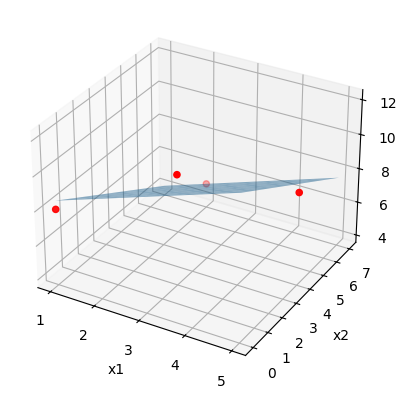

In [70]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x1, x2, y, c='r', marker='o')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

# Criar os pontos do plano
x1_plano = np.linspace(min(x1), max(x1), 10)
x2_plano = np.linspace(min(x2), max(x2), 10)
X1_plano, X2_plano = np.meshgrid(x1_plano, x2_plano)

# Calcular os valores de y correspondentes usando os coeficientes beta
Y_plano = beta[0] + beta[1] * X1_plano + beta[2] * X2_plano

# Plotar o plano
ax.plot_surface(X1_plano, X2_plano, Y_plano, alpha=0.5)

plt.show()

## Calculando correlação das variáveis

ρ(x, y) = Sxy / sqrt(Sxx * Syy)

In [71]:
x1_mean = np.mean(x1)
x2_mean = np.mean(x2)
y_mean = np.mean(y)

s_x1_x1 = np.sum((x1 - x1_mean)**2)
s_x2_x2 = np.sum((x2 - x2_mean)**2)
s_y_y = np.sum((y - y_mean)**2)

s_x1_y = np.sum((x1 - x1_mean) * (y - y_mean))
s_x2_y = np.sum((x2 - x2_mean) * (y - y_mean))

r1 = s_x1_y / np.sqrt(s_x1_x1 * s_y_y)
r2 = s_x2_y / np.sqrt(s_x2_x2 * s_y_y)

print(f'Correlação entre x1 e y: {r1}')
print(f'Correlação entre x2 e y: {r2}')

Correlação entre x1 e y: 0.45175395145262565
Correlação entre x2 e y: -0.6717651061274423


## Calculando coeficiente de determinação das variáveis

R(x, y)² = ρ(x, y)²

In [72]:
print(f'Coeficiente de determinação de x1: {r1**2} ou {(r1**2)*100:.2f}%')
print(f'Coeficiente de determinação de x2: {r2**2} ou {(r2**2)*100:.2f}%')

Coeficiente de determinação de x1: 0.20408163265306126 ou 20.41%
Coeficiente de determinação de x2: 0.45126835781041386 ou 45.13%


## Teste de relevância da variável x2 para o modelo

H0: β_2 = 0
H1: β_2 != 0

In [73]:
K = 2
N = len(y)
P = len(beta) - 1
t_005 = 3.16

variancia = ((y - X @ beta).T @ (y - X @ beta)) / (N - P - 1)
C = np.linalg.inv(X.T @ X)
T_beta_2 = beta[K-1] / np.sqrt(variancia * C[K][K]) # Offset de -1 por causa da indexação da matriz
T_beta_2_squared = T_beta_2**2

print(f'Variância: {variancia}')
print(f'T_beta_2: {T_beta_2}')
print(f'T_beta_2²: {T_beta_2_squared}')

if T_beta_2_squared > t_005:
  print('\nX2 é relevante para o modelo')
else:
  print('\nX2 não é relevante para o modelo')

Variância: 1.4999999999999982
T_beta_2: 3.549647869859769
T_beta_2²: 12.599999999999994

X2 é relevante para o modelo
